# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [24]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [89]:
data = pd.read_csv('weight-height.csv')
data.head()
male_df =  data.loc[data['Gender']=='Male']
female_df =  data.loc[data['Gender']=='Female']

print('Male Height mean:', male_df.Height.mean())
print('Male Height sd:', male_df.Height.std())
print('Male Weight mean:' ,male_df.Weight.mean())
print('Male Weight sd:', male_df.Weight.std())

print('Female Height mean:', female_df.Height.mean())
print('Female Height sd:', female_df.Height.std())
print('Female Weight mean:', female_df.Weight.mean())
print('Female Weight sd:', female_df.Weight.std())
  
#print(male_df.describe(), female_df.describe())
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight sd: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight sd: 19.022467805319028


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

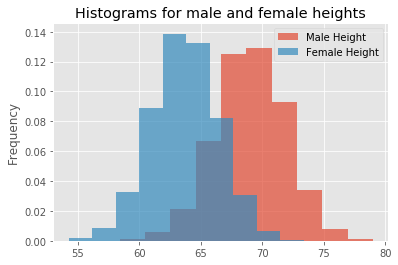

In [62]:
plt.hist(male_df.Height, bins = 10, alpha=0.7, density= True, label = 'Male Height')
plt.hist(female_df.Height, bins = 10,  alpha=0.7,density= True, label = 'Female Height')
plt.title('Histograms for male and female heights')
plt.legend()
plt.ylabel('Frequency')
plt.show()


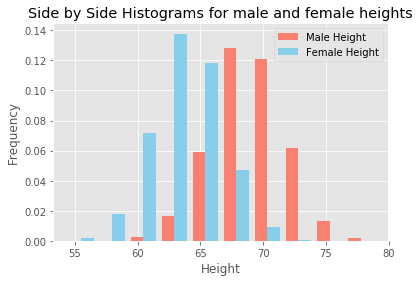

In [63]:
# Record your observations - are these inline with your personal observations?

male_h = list( data[data['Gender']=='Male']['Height'])
female_h = list( data[data['Gender']=='Female']['Height'])
colors = [ 'salmon','skyblue']
Gender = ['Male Height','Female Height']
plt.hist([male_h,female_h], bins = 10, density = True, color = colors, label=Gender)
plt.title('Side by Side Histograms for male and female heights')
plt.legend()
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()




##Record your observations - are these inline with your personal observations?

Both Male & Female Heights are normally distributed because the shape of the columns are symmetric bell shaped. 

Men tend to be taller than women

Most of the men and women are about 66 - 67 inches tall

Female heights tend to be closer to the mean while the men's heights are slightly spread out/have a wider range of values compared to Female heights.


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

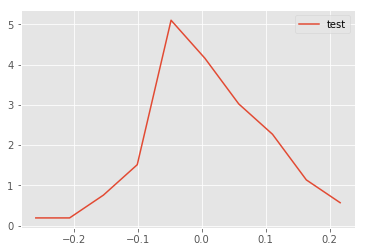

In [67]:
def density(x):
    n, bins = np.histogram(x, 10, density =True)
    fdx = np.zeros(n.size)
    fdy = np.zeros(n.size)
    
    for i in range(n.size):
        fdx[i] = 0.5*(bins[i]+bins[i+1])
        fdy[i] = n[i]
    return fdx, fdy



#Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

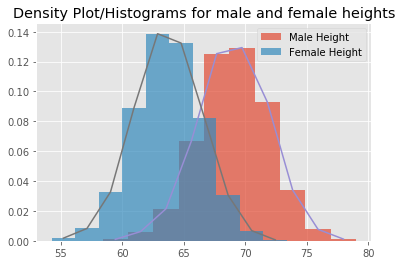

In [87]:
# You code here 
plt.hist(male_df.Height, bins = 10, alpha=0.7, density= True, label = 'Male Height')
plt.hist(female_df.Height, bins = 10,  alpha=0.7,density= True, label = 'Female Height')
plt.title('Density Plot/Histograms for male and female heights')
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()

#### Repeat above exercise for male and female weights

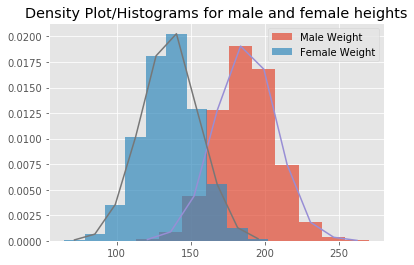

In [92]:
# Your code here 
plt.hist(male_df.Weight, bins = 10, alpha=0.7, density= True, label = 'Male Weight')
plt.hist(female_df.Weight, bins = 10,  alpha=0.7,density= True, label = 'Female Weight')
plt.title('Density Plot/Histograms for male and female heights')
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

#### Write your observations in the cell below.

# Record your observations - are these inline with your personal observations?

Just like the Height histograms, both Male & Female Weights are normally distributed because the shape of the columns are symmetric bell shaped.

Men tend to weigh heavier than women

Majority of the men and women weigh about 160 lbs

Female weights tend to be closer to the mean while the men's weights have very slight variation/wide spread values compared to Female weights.


# So whats the takeaway when comparing male and female heights and weights 
Histograms are a great way of exploring a single variable - height/weight.
The overlapping bars in the Height histogram make it difficult to compare between male & female heights



#### Repeat Above experiments in seaborn and compare with your results. 

/Users/rndatasc/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


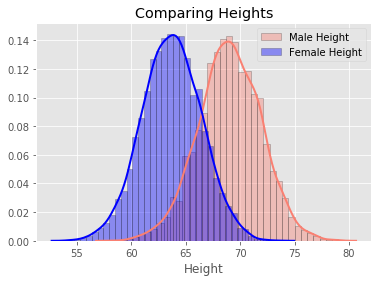

In [105]:
import seaborn as sns
sns.distplot(male_df['Height'], hist=True, kde = True, bins= int(180/5), color='salmon', hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},label = 'Male Height')
sns.distplot(female_df['Height'], hist=True, kde = True, bins= int(180/5), color='blue', hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},label = 'Female Height')
plt.title('Comparing Heights')
plt.legend()



/Users/rndatasc/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


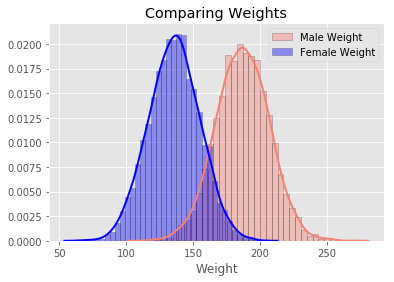

In [106]:
import seaborn as sns
sns.distplot(male_df['Weight'], hist=True, kde = True, bins= int(180/5), color='salmon', hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},label = 'Male Weight')
sns.distplot(female_df['Weight'], hist=True, kde = True, bins= int(180/5), color='blue', hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},label = 'Female Weight')
plt.title('Comparing Weights')
plt.legend()


In [ ]:
# Your comments on the two approaches here. 
The density plots are a smoother version of the histogram.
The density plots improved visualization of the heights and weights of male & females.
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.